<a href="https://colab.research.google.com/github/tc10767557/Portfolio/blob/main/MLP%20Classifier%20and%20the%20Naive%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teagan Clark

Dr. Regis

Advanced DSC

14 February 2025

#Homework 2

##Import / Connect Drive

In [ ]:
# Import Packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import root_mean_squared_error, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

In [ ]:
# Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Junior Year/Spring Semester/DSC 326

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Junior Year/Spring Semester/DSC 326


##Question 1

The Energy Efficiency Dataset (ENB2012_data.csv) comprises 768 samples, each representing
a unique building configuration. The dataset includes 8 features related to building design
parameters and aims to predict two continuous outcomes: Heating Load and Cooling Load.
More information on this data set, including details on the features and the target variable are
available on https://archive.ics.uci.edu/dataset/242/energy+efficiency. We wish
to train a Multilayer Perceptron (MLP) Neural Network Regressor for the Heating Load (Y1)
variable in terms of the 8 predictor variables, which are all numerical, by performing the
following steps: (Note: Do not include Y2 as a predictor variable.)

###Part A

Read the data set into a DataFrame and then split the data set into training and testing
sets. Use 80% of the data for training.

In [ ]:
# Read Data Set into a DataFrame
df = pd.read_csv('ENB2012_data.csv')
X = df.drop(['Y1', 'Y2'], axis=1)
y = df['Y1']

In [ ]:
# Split the Data into 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=23)

###Part B

Perform preprocessing on the training data by scaling the numerical features and the
target variable using MinMaxScaler.

In [ ]:
# Scale using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

###Part C

Train an MLPRegressor with 2 hidden layers that have 10 hidden nodes for each hidden
layer. Calculate the RMSE of the neural network on the training data.

In [ ]:
# MLPRegressor with 2 hidden layers that have 10 hidden nodes each
MLP = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000,
                   random_state=23)

In [ ]:
# Calculate RMSE on Training Set

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(MLP, X_train_scaled, y_train, cv=5,
                            scoring='neg_root_mean_squared_error')
cv_scores # negative RMSE from the different folds

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perce

array([-2.56032751, -2.86510654, -2.47559064, -2.43223622, -2.88491418])

In [ ]:
# Compute the overall RMSE
cv_rmse = -np.mean(cv_scores)
print(f"Cross-Validation RMSE: {cv_rmse:.4f}")

Cross-Validation RMSE: 2.6436


###Part D

What is the total number of weights in the neural network? What are the activation
functions used on each hidden node and on each output node?

The neural network has 211 weights. (8x10 / 80 from input to the first hidden layer, another 10x10 / 100 from the first hidden layer to the 2nd, 10x1 / 10 from the 2nd hidden layer to the output. Each node in the hidden layers and output also have the bias weight which adds another 10+10+1 / 21.)

The hidden layers use ReLU activation, while the output doesn't have an activation function (since it's regression, not classification).

###Part E

Create a scatterplot of the predicted value of Y1 versus the observed value of Y1 and
then draw the line where the predicted and observed values of Y1 are equal. Then,
calculate the RMSE of the neural network on the test set.

In [ ]:
# Fit Model on Scaled Training Set
MLP.fit(X_train_scaled, y_train)

# Scale Test Set using same scaler as Training Set
X_test_scaled = scaler.fit_transform(X_test)

# Predict Y1 on Scaled Test Set
y_pred = MLP.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


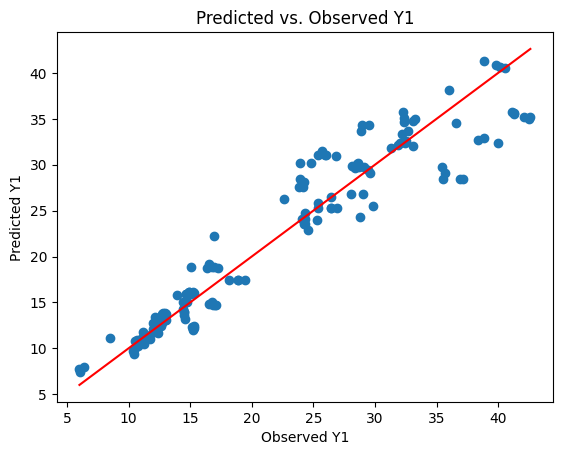

In [ ]:
# Scatterplot of Predicted vs. Observed Y1
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         color='red')
plt.xlabel('Observed Y1')
plt.ylabel('Predicted Y1')
plt.title('Predicted vs. Observed Y1')
plt.show()

In [ ]:
# Calculate RMSE on Test Set
rmse_test = root_mean_squared_error(y_test, y_pred)
print(f"Test RMSE: {rmse_test:.4f}")

Test RMSE: 2.9146


###Part F

Train a larger MLPRegressor with 2 hidden layers that have 100 hidden nodes for each
hidden layer. Calculate the RMSE of the neural network on the training data and on
the test data. Is this neural network an improvement over the previous one in terms of
its performance on the test set? Briefly explain.

In [ ]:
# Train a Larger MLPRegressor
larger_MLP = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000,
                          random_state=23)
larger_MLP.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=23)

In [ ]:
# Calculate RMSE on Training Set
y_train_pred_larger = larger_MLP.predict(X_train_scaled)
rmse_train_larger = root_mean_squared_error(y_train, y_train_pred_larger)
print(f"Larger MLP Training RMSE: {rmse_train_larger:.4f}")

Larger MLP Training RMSE: 2.5210


In [ ]:
# Calculate RMSE on Test Set
y_test_pred_larger = larger_MLP.predict(X_test_scaled)
rmse_test_larger = root_mean_squared_error(y_test, y_test_pred_larger)
print(f"Larger MLP Test RMSE: {rmse_test_larger:.4f}")

Larger MLP Test RMSE: 2.6719


In [ ]:
# Previous MLP's Test RMSE
print(f"Previous MLP Test RMSE: {rmse_test:.4f}")

Previous MLP Test RMSE: 2.9146


Since the root mean squared error of the previous MLP is larger, the (new) larger MLP has better performance on the test set.

###Part G

Fit a first-order multiple linear regression model for Y1 in terms of the 8 predictor
variables on the training set and calculate its RMSE on the test set. How does this
compare with the RMSEs on the test set of the two neural networks above?

In [ ]:
# Fit Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predict with Scaled Test Set
y_pred_linear = linear_model.predict(X_test_scaled)

# Calculate RMSE on Test Set
rmse_linear = root_mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression's Test RMSE: {rmse_linear:.4f}")

Linear Regression's Test RMSE: 3.0092


In [ ]:
# First MLP's Test RMSE
print(f"First MLP's Test RMSE: {rmse_test:.4f}")

First MLP's Test RMSE: 2.9146


In [ ]:
# Larger MLP's Test RMSE
print(f"Larger MLP's Test RMSE: {rmse_test_larger:.4f}")

Larger MLP's Test RMSE: 2.6719


The linear regression model actually has a higher RMSE than both of the MLP Regression Neural Networks, meaning it is somewhat less effective at predicting the output than those two.

##Question 2

The Online Shoppers Purchasing Intention Dataset (online_shoppers_intention.csv) contains
12,330 sessions from an e-commerce website, capturing user behavior over a one-year period.
It includes 17 features (10 numerical, 7 categorical) that track browsing activity, session
characteristics, and purchase likelihood. More information on this data set, including details
on the features and the target variable are available on https://archive.ics.uci.edu/
dataset/468/online+shoppers+purchasing+intention+dataset. The primary goal is to
predict whether a session will result in a purchase, as indicated by the Revenue attribute. We wish to train a Multilayer Perceptron (MLP) Neural Network Classifier for the binary target
variable Revenue in terms of the other variables by performing the following steps:

###Part A

Read the data set into a DataFrame and then split the data set into training and testing
sets. Use 80% of the data for training.

In [ ]:
# Read Data Set into a DataFrame
online_df = pd.read_csv('online_shoppers_intention.csv')
X = online_df.drop('Revenue', axis=1)
y = online_df['Revenue']

In [ ]:
# Split the Data into 80% Training and 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

###Part B

The categorical features in the data set are: Month, OperatingSystems, Browser, Region,
TrafficType, VisitorType, Weekend. Perform preprocessing on the training data by
applying one-hot encoding to all the categorical features, scaling the numerical variables
using MinMaxScaler, and encoding the target variable using the label encoder.

In [ ]:
# Identify Categorical / Numerical Features
categorical_features = ['Month', 'OperatingSystems', 'Browser',
                        'Region', 'TrafficType', 'VisitorType',
                        'Weekend']
numerical_features = X_train.columns.difference(categorical_features)

In [ ]:
# Create Transformers
numerical_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine Transformers with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Fit and Transform Training Set
X_train_processed = preprocessor.fit_transform(X_train)

# Encode Target Variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

###Part C

Train an MLPClassifier with 2 hidden layers that have 100 hidden nodes for each hidden
layer. Calculate the accuracy of the neural network on the training data.

In [ ]:
# Train MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(100, 100),
                    max_iter=1000, random_state=23)
MLP.fit(X_train_processed, y_train_encoded)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=23)

In [ ]:
# Calculate Accuracy on Training Set
accuracy = MLP.score(X_train_processed, y_train_encoded)
print(f"Accuracy of neural network on training set: {accuracy:.4f}")

Accuracy of neural network on training set: 0.9807


###Part D

What is the total number of weights in the neural network? What are the activation
functions used on each hidden node and on each output node?

The neural network has 10901 weights. (7x100 / 700 from input to the first hidden layer, another 100x100 / 10000 from the first hidden layer to the 2nd, 100x1 / 100 from the 2nd hidden layer to the output. Each node in the hidden layers and output also have the bias weight which adds another 100+100+1 / 201.)

The hidden layers use ReLU activation, while the output uses Sigmoid activation function (since it's classification, not regression).

###Part E

Calculate the confusion matrix resulting from the neural network predictions on the test
set and then calculate the accuracy, precision, recall and f1 score on the test set.

In [ ]:
# Transform Test Set using same Preprocessor as Training Set
X_test_processed = preprocessor.transform(X_test)

# Encode Test Target Variable using same Label Encoder
y_test_encoded = label_encoder.transform(y_test)

# Predict on Processed Test Set
y_pred_encoded = MLP.predict(X_test_processed)

In [ ]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1915  178]
 [ 180  193]]


In [ ]:
# Calculate Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(y_test_encoded, y_pred_encoded)
print(f"Precision: {precision:.4f}")
recall = recall_score(y_test_encoded, y_pred_encoded)
print(f"Recall: {recall:.4f}")
f1 = f1_score(y_test_encoded, y_pred_encoded)
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8548
Precision: 0.5202
Recall: 0.5174
F1 Score: 0.5188


###Part F

Consider the naive algorithm whose prediction for any new instance is the most frequent
class or label seen on the training set. What is the accuracy of this algorithm on the
test set? How does this compare with the accuracy of the trained MLPClassifier on the
test set obtained from Part E?

In [ ]:
# Find Most Frequent Class in Training Set
most_frequent_class = y_train.mode()[0]

# Predict Most Frequent Class for all instances in Test Set
naive_predictions = np.full(y_test.shape, most_frequent_class)

# Calculate Accuracy of Naive Algorithm
naive_accuracy = accuracy_score(y_test, naive_predictions)
print(f"Accuracy of the naive algorithm: {naive_accuracy:.4f}")

Accuracy of the naive algorithm: 0.8487


In [ ]:
# Compare with Accuracy of MLP Classifier
print(f"Accuracy of the MLP Classifier: {accuracy:.4f}")

Accuracy of the MLP Classifier: 0.8548


The naive "assume everything is most frequent class" algorithm, is only slightly less accurate than the actual MLP Classifier.